In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from ReliefF import ReliefF

In [2]:
root = "../../../"

In [3]:
df = pd.read_csv(root + "datasets/binary/processed/CICDDoS_corr.csv", index_col=[0])

In [4]:
df[' Label'] = df[' Label'].apply(lambda x: 'ATTACK' if x != 'BENIGN' else 'BENIGN')

In [5]:
X = df.drop(columns=[' Label'])
y = df[' Label']

In [6]:
relief = ReliefF(n_neighbors=20, n_features_to_keep=20)
relief.fit(X.to_numpy(),y.to_numpy())
relief.feature_scores

array([-19932.,  78138.,  54628.,  30766.,  73642.,  56820.,  67588.,
       -10942., -19140., -19912., -10250.,   6684.,  45032.,  35234.,
        36118.,  72324.,  36304.,  47272.,  95234.,  15752.,  60674.,
       -19148.,  15382.,  46746.,  30288.,  49930.,  95234.,  94088.,
        92988.,  90356.,  84502.,  78138.,  54628.,  58250.,  61912.,
        72878.,  86328.,  89562.,  89116.,  85628.])

Text(0, 0.5, 'Weights')

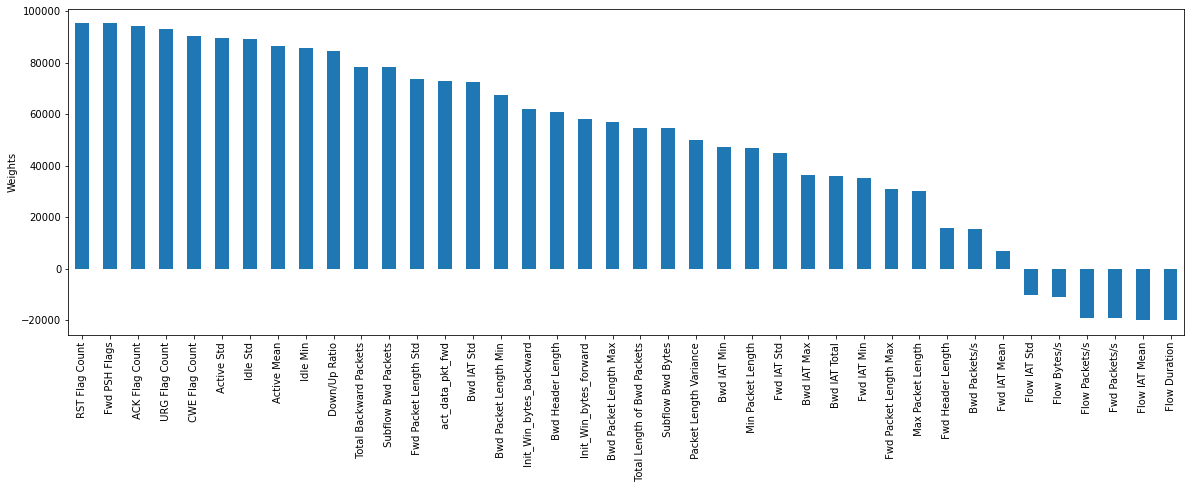

In [7]:
# 1) let's capture the above array in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a bar plot

weights = pd.Series(relief.feature_scores)
weights.index = X.columns
weights.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Weights')

In [8]:
# display features
X.columns[relief.top_features[:20]]

Index(['Fwd PSH Flags', ' RST Flag Count', ' ACK Flag Count',
       ' URG Flag Count', ' CWE Flag Count', ' Active Std', ' Idle Std',
       'Active Mean', ' Idle Min', ' Down/Up Ratio', ' Subflow Bwd Packets',
       ' Total Backward Packets', ' Fwd Packet Length Std',
       ' act_data_pkt_fwd', ' Bwd IAT Std', ' Bwd Packet Length Min',
       ' Init_Win_bytes_backward', ' Bwd Header Length',
       'Init_Win_bytes_forward', 'Bwd Packet Length Max'],
      dtype='object')

In [9]:
# to remove the rest of the features:

X = relief.transform(X.to_numpy())

In [10]:
X.shape

(5280, 20)